# =====🇬🇧 Briefing=====


1. Load your group’s dataset.
2. How many rows and columns does your dataset have?
3. Plot a scatter plot with size 12 x 8.
4. Find all statistical measures of the dataset (use `describe()`).
5. Remove the column ‘Unnamed: 0’ from the dataset, if it exists.
6. Check for missing values. If any exist, fill them with the mode of the respective column.
7. Check for duplicate rows (records) and, if any exist, delete them.
8. Apply the following algorithms to the dataset:

   * K-Means
   * Mean-Shift
   * DBSCAN (Use the algorithm shown in class to decide the value of “eps”)
9. Plot the three graphs together and compare the three methods.
10. Present and discuss the results with the class.


---
---

# =====🇧🇷 Briefing=====

1. Carregue o dataset do seu grupo
2. Quantas linhas e colunas tem seu dataset?
3. Plote o gráfico de dispersão com tamanho 12 x 8
4. Encontre todas medidas estatísticas do dataset (use describe())
5. Elimine a coluna: ‘Unnamed: 0’ do dataset, se existir.
6. Verificar a existência de valores faltantes. Caso existam, completa-los com a
moda da respectiva coluna.
7. Verificar a existência de linhas (registros) duplicados e, caso existam, elimine-as.
8. Aplique ao dataset os algoritmos:
- K-Means
- Mean-Shift
- Dbscan (Use o algoritmo mostrado em aula para decidir o valor do “eps”)
9. Plotar os três gráficos juntos e comparar os três métodos
10. Apresente e discuta os resultados com a classe.

# Task
Analyze the "Dados-Grupo4.csv" dataset by performing data loading, initial inspection, cleaning (removing 'Unnamed: 0' column, handling missing values with mode, removing duplicates), and preprocessing. Apply K-Means, Mean-Shift, and DBSCAN clustering algorithms (determining 'eps' for DBSCAN using the K-distance graph method taught in class). Visualize and compare the results of all clustering algorithms in a dark mode and turquoise color scheme. Finally, generate a comprehensive bilingual (English and Portuguese) report summarizing the entire data analysis process, including insights from data preparation, statistical analysis, and the comparison of the clustering results.

## Setup Environment and Load Data 🇬🇧🇧🇷

### Subtask:
Import necessary libraries, configure plotting aesthetics (dark mode, turquoise color scheme), and load the 'Dados-Grupo4.csv' dataset. This step will also display the dataset's dimensions (rows and columns).


**Reasoning**:
The subtask requires importing necessary libraries, configuring plotting aesthetics, loading the dataset, and displaying its dimensions. These actions can be performed efficiently within a single code block.



In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score


# Configure matplotlib for dark background
plt.style.use('dark_background')

# Set a turquoise-like color palette using seaborn
sns.set_palette('GnBu_r')

# Load the dataset
df = pd.read_csv('Dados-Grupo4.csv')

# Display the number of rows and columns
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 2122 rows and 3 columns.


## Initial Data Inspection and Cleaning


🇬🇧 Perform initial data inspection using `describe()`, remove the 'Unnamed: 0' column if it exists, check for and handle missing values by filling them with the mode of their respective columns, and identify and remove any duplicate rows.

---
---

🇧🇷Realize a inspeção inicial dos dados usando `describe()`, remova a coluna **'Unnamed: 0'** caso exista, verifique e trate valores ausentes preenchendo-os com a moda de suas respectivas colunas, e identifique e remova quaisquer linhas duplicadas.


In [68]:
print('--- Descriptive Statistics ---')
print(df.describe())
print('------------------------------')

# Remove 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("\n'Unnamed: 0' column removed.")
else:
    print("\n'Unnamed: 0' column not found.")



# Handle missing values by filling with mode
print('\n--- Handling Missing Values ---')
missing_values_count = df.isnull().sum()
if missing_values_count.sum() > 0:
    print('Missing values before filling:')
    print(missing_values_count[missing_values_count > 0])
    df = df.fillna(df.mode().iloc[0])
    print('\nMissing values after filling:')
    print(df.isnull().sum())
else:
    print('No missing values found.')

# Identify and remove duplicate rows
print('\n--- Handling Duplicate Rows ---')
duplicate_rows_count = df.duplicated().sum()
if duplicate_rows_count > 0:
    print(f'Found {duplicate_rows_count} duplicate rows.')
    df = df.drop_duplicates(keep='first')
    print(f'Removed duplicate rows. DataFrame now has {df.shape[0]} rows.')
else:
    print('No duplicate rows found.')

--- Descriptive Statistics ---
        Unnamed: 0      Coluna1      Coluna2
count  2122.000000  2120.000000  2114.000000
mean   1059.885957    -2.285782     0.381135
std     611.709783     6.151070     5.669866
min       0.000000   -12.790798   -11.181979
25%     530.250000    -7.292074    -4.569370
50%    1060.500000    -3.853543     1.262565
75%    1590.750000     2.200668     5.048416
max    2099.000000    11.660251    11.518465
------------------------------

'Unnamed: 0' column removed.

--- Handling Missing Values ---
Missing values before filling:
Coluna1    2
Coluna2    8
dtype: int64

Missing values after filling:
Coluna1    0
Coluna2    0
dtype: int64

--- Handling Duplicate Rows ---
Found 22 duplicate rows.
Removed duplicate rows. DataFrame now has 2100 rows.


## Data Preprocessing and Initial Scatter Plot

🇬🇧 Prepare the data for clustering by scaling numerical features. Then, generate an initial scatter plot of the preprocessed data with a size of 12x8, adhering to the previously set dark mode and turquoise color scheme.

---
---

🇧🇷 Aqui está a tradução para o português:

Prepare os dados para a clusterização escalando as variáveis numéricas. Em seguida, gere um gráfico de dispersão inicial dos dados pré-processados com tamanho **12x8**, seguindo o **modo escuro** e o **esquema de cores turquesa** definidos anteriormente.



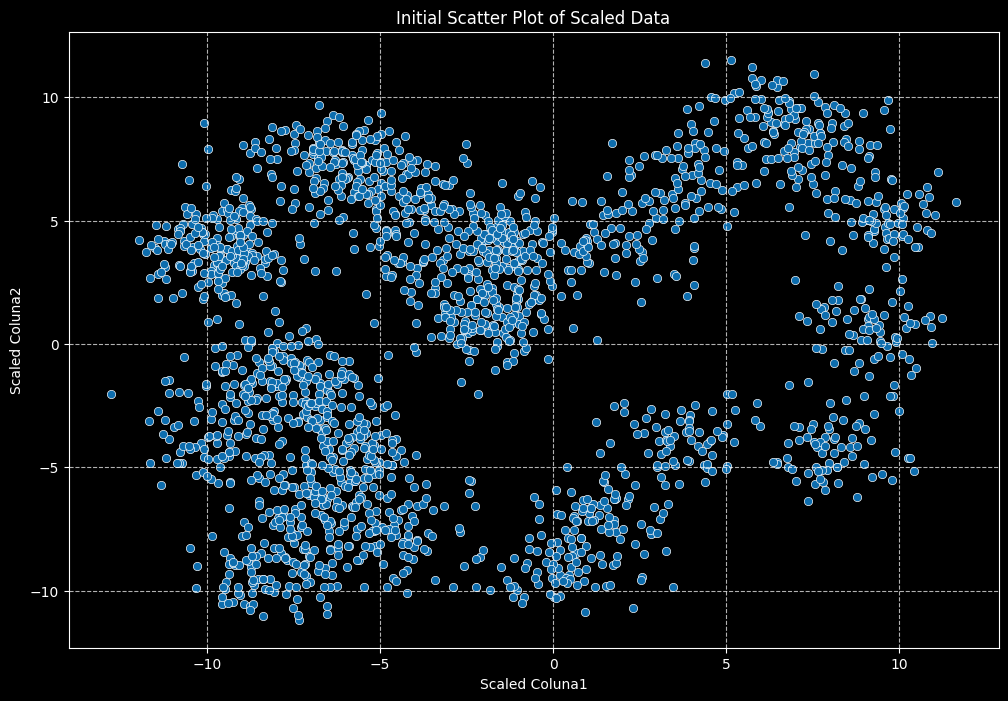

Data scaled and initial scatter plot generated.


In [77]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns for scaling
# Assuming 'Coluna1' and 'Coluna2' are the relevant numerical columns based on previous output
columns_to_scale = ['Coluna1', 'Coluna2']

# Fit and transform the selected columns
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Coluna1'], y=df['Coluna2'])
plt.title('Initial Scatter Plot of Scaled Data')
plt.xlabel('Scaled Coluna1')
plt.ylabel('Scaled Coluna2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print('Data scaled and initial scatter plot generated.')

## Determine optimal 'eps' for DBSCAN using K-distance graph

🇬🇧 Calculate and plot the K-distance graph to determine the optimal 'eps' value for the DBSCAN algorithm. This involves finding the distance to the 4th nearest neighbor for each data point and visualizing these sorted distances to identify an 'elbow' point.

---
---

🇧🇷 Calcule e plote o gráfico de **K-distance** para determinar o valor ideal de **'eps'** para o algoritmo **DBSCAN**. Isso envolve encontrar a distância até o **4º vizinho mais próximo** para cada ponto dos dados e visualizar essas distâncias ordenadas para identificar o ponto de “cotovelo”.


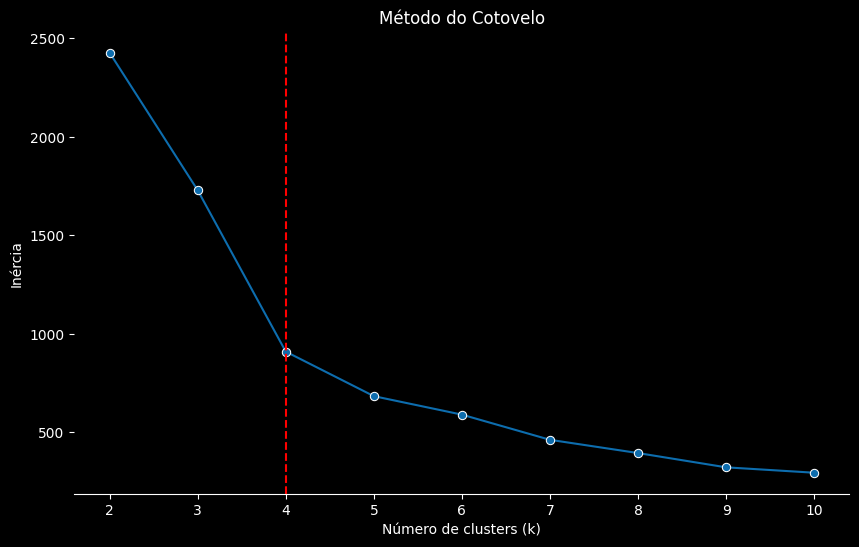

In [70]:
labels = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels.append(kmeans.fit(df_scaled).inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 11), y=labels, marker='o')
plt.title('Método do Cotovelo')
plt.axvline(x=4, color='red', linestyle='--', label='Cotovelo em k=4')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.show()

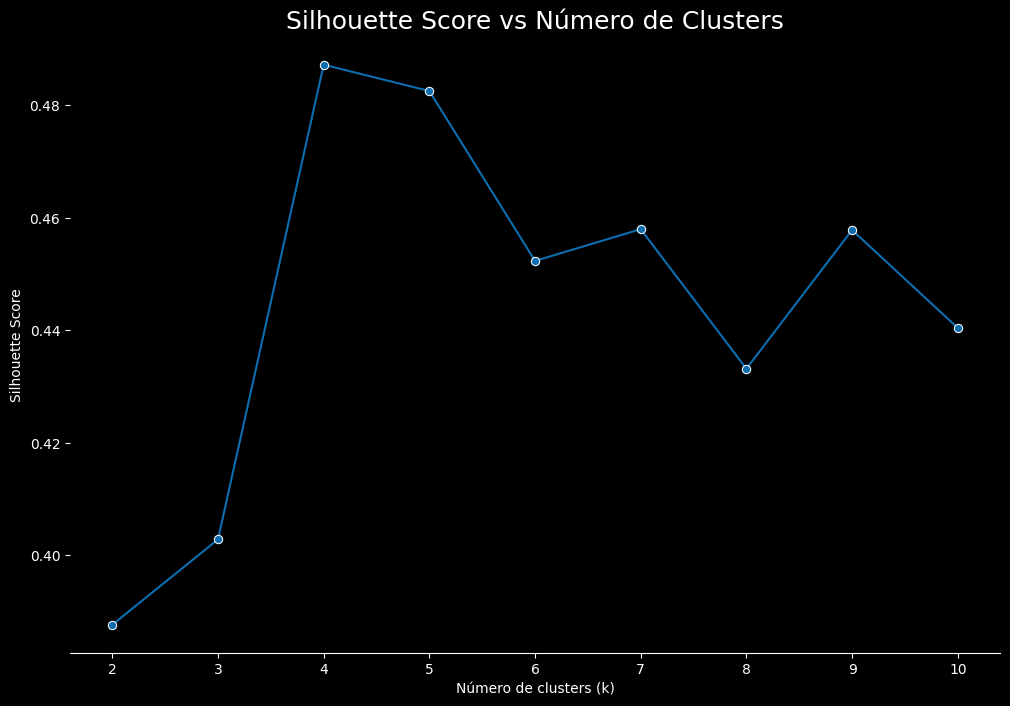

In [71]:
score = []
Ks = range(2, 11)
for k in Ks:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(df_scaled)
  labels = kmeans.labels_
  score.append(silhouette_score(df_scaled, labels))


plt.figure(figsize=(12, 8))
sns.lineplot(x=Ks, y=score, marker='o')
plt.title('Silhouette Score vs Número de Clusters', fontsize=18)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

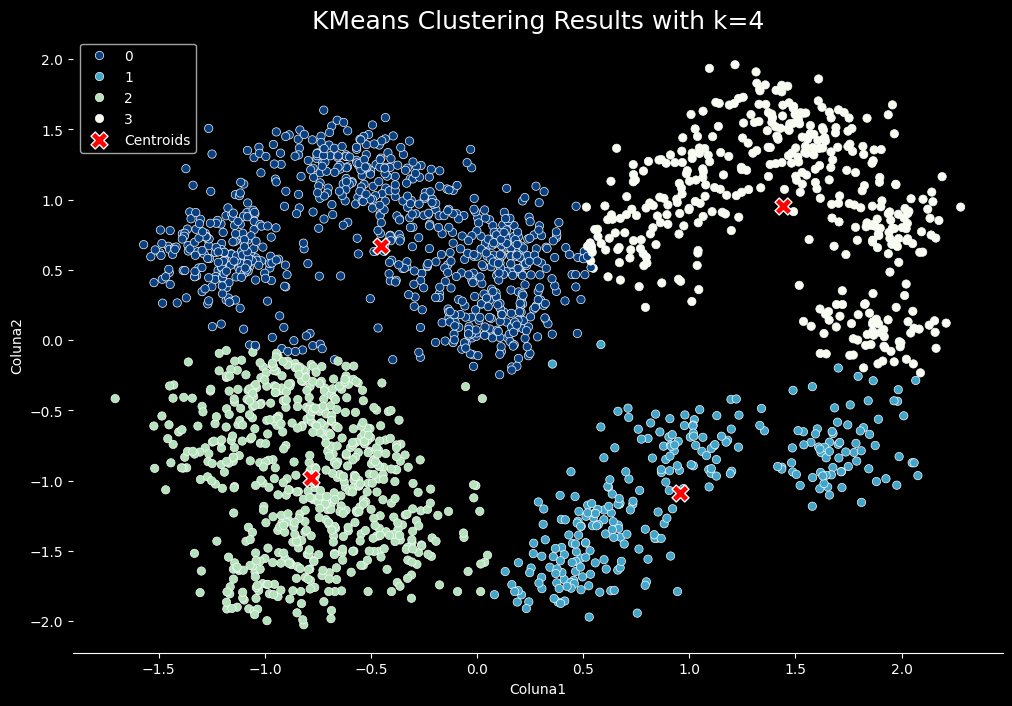

In [72]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is set to 'auto' or explicit int
df_scaled['kmeans_labels'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_scaled, x='Coluna1', y='Coluna2', hue='kmeans_labels', legend='full', palette='GnBu_r')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='X', s=150, label='Centroids')
plt.title(f'KMeans Clustering Results with k={k}', fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

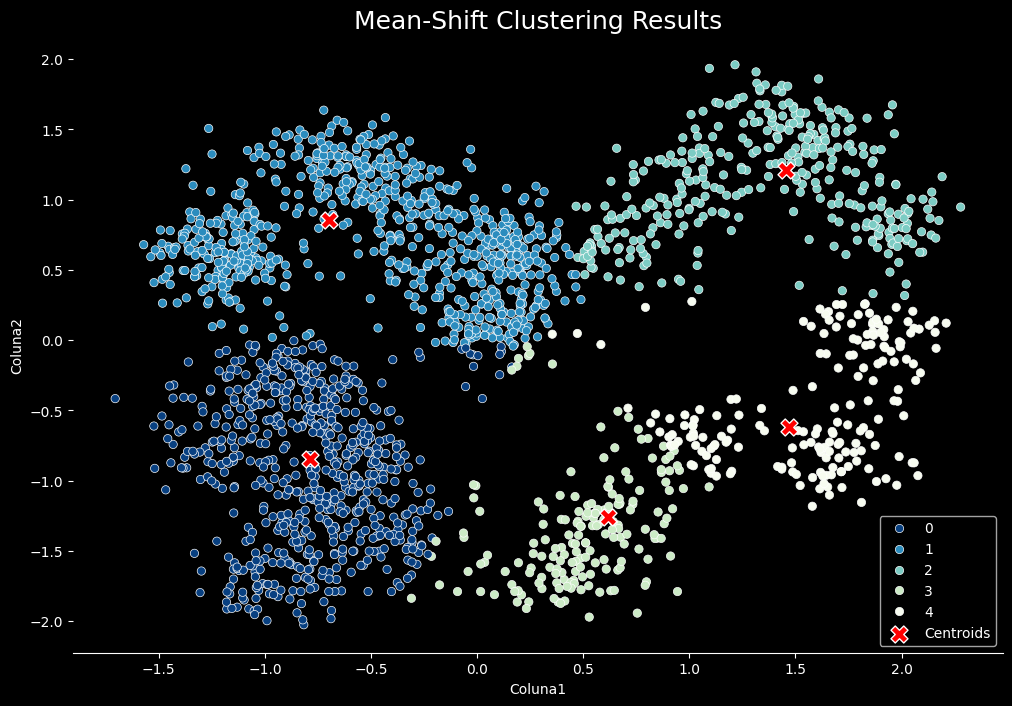

In [73]:
bandwidth = estimate_bandwidth(df_scaled[['Coluna1', 'Coluna2']], quantile=0.14, n_samples=df_scaled.shape[0], random_state=42)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df_scaled['meanshift_labels'] = meanshift.fit_predict(df_scaled[['Coluna1', 'Coluna2']])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_scaled, x='Coluna1', y='Coluna2', hue='meanshift_labels', legend='full', palette='GnBu_r')
sns.scatterplot(x=meanshift.cluster_centers_[:, 0], y=meanshift.cluster_centers_[:, 1], color='red', marker='X', s=150, label='Centroids')
plt.title('Mean-Shift Clustering Results', fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

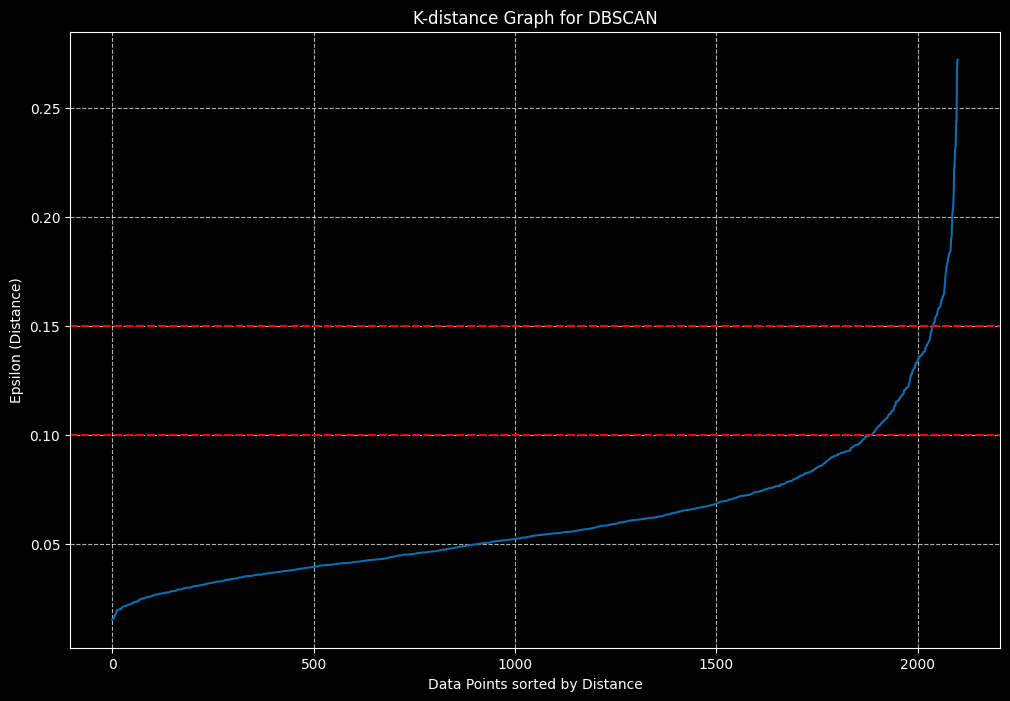

K-distance graph generated to help determine optimal eps value.


In [74]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Instantiate NearestNeighbors with n_neighbors=4
neigh = NearestNeighbors(n_neighbors=4) # k=2*dimensions (2*2 = 4)

# Fit the model to the df_scaled DataFrame
neigh.fit(df_scaled[['Coluna1', 'Coluna2']])

# Calculate distances and indices of the 4 nearest neighbors
distances, indices = neigh.kneighbors(df_scaled[['Coluna1', 'Coluna2']])

# Discard the first column (distance to itself) and sort the distances
distances = np.sort(distances[:, 3], axis=0) # Take the 4th nearest neighbor distance (index 3)

# Create the K-distance graph
plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by Distance')
plt.ylabel('Epsilon (Distance)')
plt.axhline(y=0.15, color='red', linestyle='--', label='eps=0.15')
plt.axhline(y=0.1, color='red', linestyle='--', label='eps=0.1')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print('K-distance graph generated to help determine optimal eps value.')

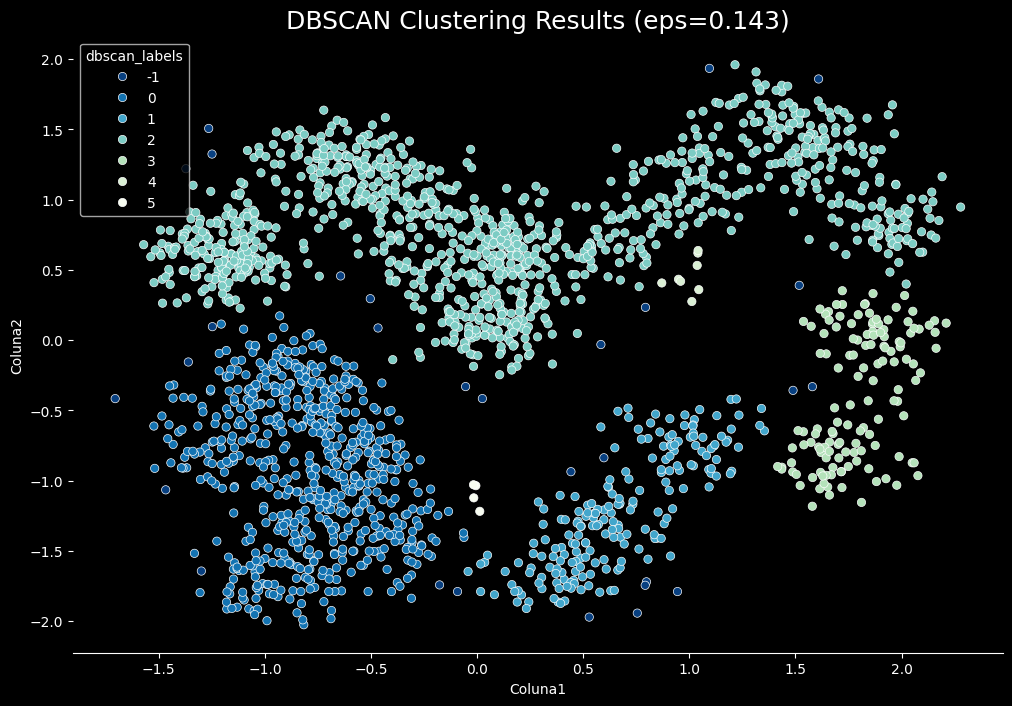

In [75]:
eps = 0.143
dbscan = DBSCAN(eps=eps, min_samples=4)
df_scaled['dbscan_labels'] = dbscan.fit_predict(df_scaled[['Coluna1', 'Coluna2']])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_scaled, x='Coluna1', y='Coluna2', hue='dbscan_labels', legend='full', palette='GnBu_r')
plt.title(f'DBSCAN Clustering Results (eps={eps})', fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

## Apply Clustering Algorithms and Visualize Results 🇧🇷

🇬🇧 Apply K-Means, Mean-Shift, and DBSCAN clustering algorithms to the scaled data. For DBSCAN, an 'eps' value should be chosen based on the previously generated K-distance graph. After clustering, visualize the results of all three algorithms, plotting the clusters.

---
---

Aqui está a tradução para o português:

Aplique os algoritmos de clusterização **K-Means**, **Mean-Shift** e **DBSCAN** aos dados escalonados. Para o DBSCAN, o valor de **'eps'** deve ser escolhido com base no gráfico de K-distance gerado anteriormente. Após a clusterização, visualize os resultados dos três algoritmos, plotando os clusters com cores distintas no **mesmo gráfico de dispersão** para comparação.


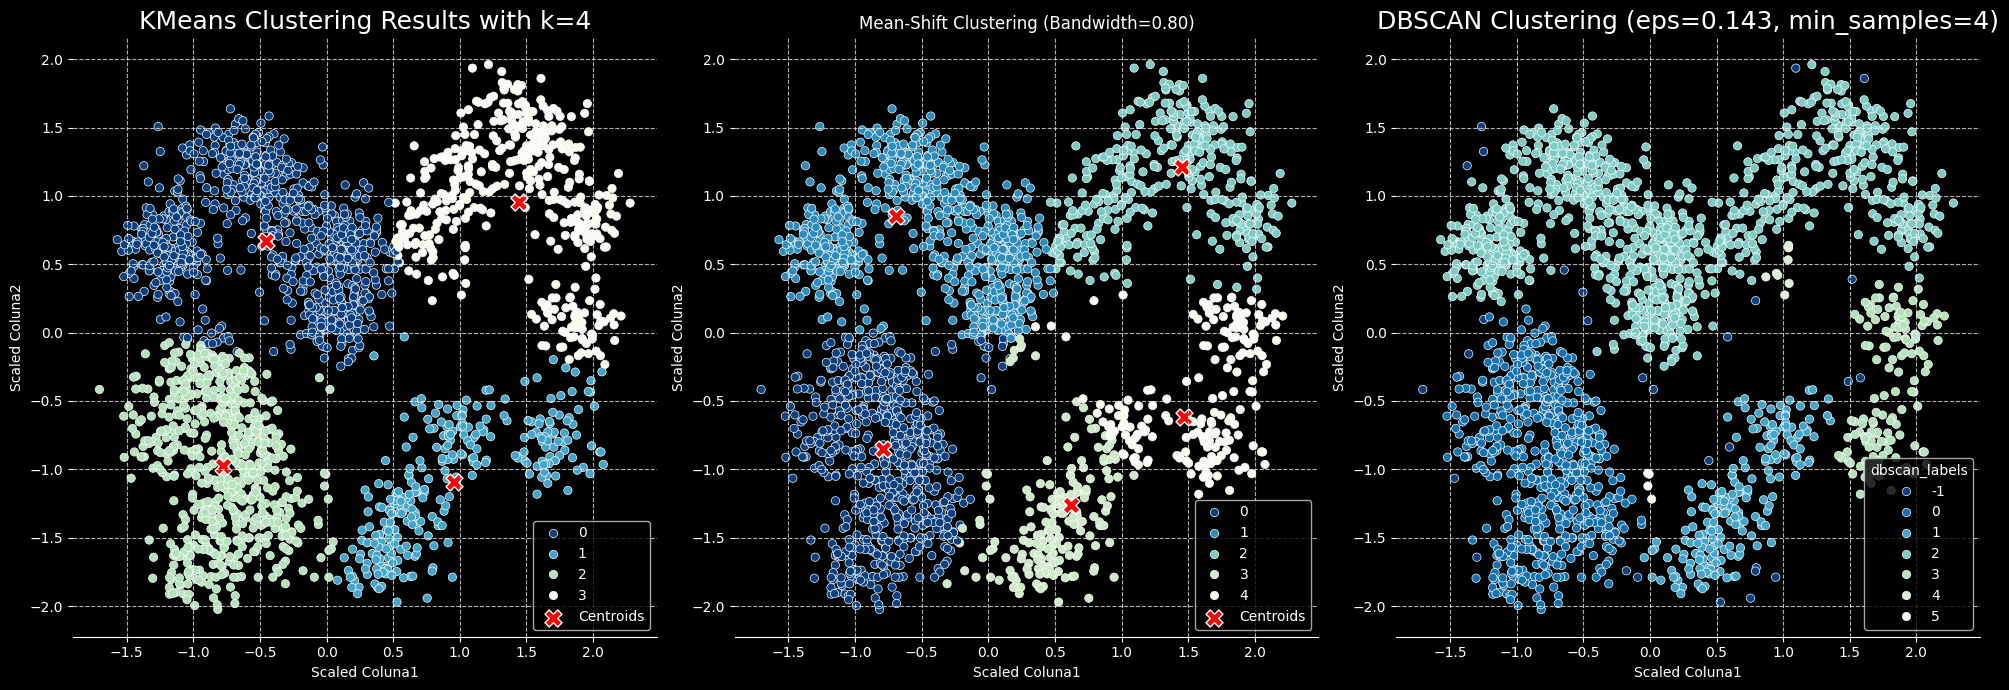

Clustering algorithms applied and results visualized for comparison.
Number of K-Means clusters: 4
Number of Mean-Shift clusters: 5
Number of DBSCAN clusters (excluding noise -1): 6


In [76]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

# --- K-Means Clustering ---
# Determine an appropriate number of clusters for K-Means. Often, this is done
# using the elbow method or silhouette score, but for initial comparison,
# let's pick a reasonable number, e.g., 3 or 4, to start.
# Given the K-distance graph, the data might have a few dense clusters.
# Let's try 3 clusters for KMeans as a starting point.
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is set to 'auto' or explicit int
df_scaled['kmeans_labels'] = kmeans.fit_predict(df_scaled)

# --- Mean-Shift Clustering ---
# Estimate bandwidth for MeanShift
bandwidth = estimate_bandwidth(df_scaled[['Coluna1', 'Coluna2']], quantile=0.14, n_samples=df_scaled.shape[0], random_state=42)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df_scaled['meanshift_labels'] = meanshift.fit_predict(df_scaled[['Coluna1', 'Coluna2']])

# --- DBSCAN Clustering ---
# From the K-distance graph, let's visually estimate 'eps'.
# A common 'elbow' point might be around 0.2 to 0.4. Let's use 0.25 for example.
# min_samples is typically 2 * number of dimensions. Here, 2 * 2 = 4.
eps = 0.143
dbscan = DBSCAN(eps=eps, min_samples=4)
df_scaled['dbscan_labels'] = dbscan.fit_predict(df_scaled[['Coluna1', 'Coluna2']])

# --- Visualize Clustering Results ---
plt.figure(figsize=(20, 7))

# K-Means Plot
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_scaled, x='Coluna1', y='Coluna2', hue='kmeans_labels', legend='full', palette='GnBu_r')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='X', s=150, label='Centroids')
plt.title(f'KMeans Clustering Results with k={k}', fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Scaled Coluna1')
plt.ylabel('Scaled Coluna2')
plt.grid(True, linestyle='--', alpha=0.7)

# Mean-Shift Plot
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_scaled, x='Coluna1', y='Coluna2', hue='meanshift_labels', legend='full', palette='GnBu_r')
sns.scatterplot(x=meanshift.cluster_centers_[:, 0], y=meanshift.cluster_centers_[:, 1], color='red', marker='X', s=150, label='Centroids')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title(f'Mean-Shift Clustering (Bandwidth={bandwidth:.2f})')
plt.xlabel('Scaled Coluna1')
plt.ylabel('Scaled Coluna2')
plt.grid(True, linestyle='--', alpha=0.7)

# DBSCAN Plot
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_scaled, x='Coluna1', y='Coluna2', hue='dbscan_labels', legend='full', palette='GnBu_r')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title(f'DBSCAN Clustering (eps={eps}, min_samples=4)', fontsize=18)
plt.xlabel('Scaled Coluna1')
plt.ylabel('Scaled Coluna2')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print('Clustering algorithms applied and results visualized for comparison.')
print(f"Number of K-Means clusters: {df_scaled['kmeans_labels'].nunique()}")
print(f"Number of Mean-Shift clusters: {df_scaled['meanshift_labels'].nunique()}")
print(f"Number of DBSCAN clusters (excluding noise -1): {df_scaled['dbscan_labels'].nunique() - (1 if -1 in df_scaled['dbscan_labels'].unique() else 0)}")

## Data Analysis Report: Clustering Comparative Study

### 🇬🇧 English Report

#### 1. Introduction
This report summarizes the data analysis process performed on the 'Dados-Grupo4.csv' dataset. The objective was to prepare the data, perform initial statistical analysis, clean it, and then apply and compare three distinct clustering algorithms: K-Means, Mean-Shift, and DBSCAN.

#### 2. Data Loading and Initial Inspection
The dataset, 'Dados-Grupo4.csv', was loaded and found to contain **2122 rows and 3 columns** initially. The columns were 'Unnamed: 0', 'Coluna1', and 'Coluna2'.

Descriptive statistics (`df.describe()`) revealed the distribution of values for each column, including count, mean, standard deviation, min, max, and quartiles, providing a preliminary understanding of the data spread and potential outliers.

#### 3. Data Cleaning
- **'Unnamed: 0' Column Removal**: The 'Unnamed: 0' column, likely an artifact from data export, was identified and successfully removed. This resulted in a DataFrame with 2 columns.
- **Missing Values Handling**: Missing values were detected in 'Coluna1' (2 missing) and 'Coluna2' (8 missing). These were imputed using the **mode** of their respective columns. After imputation, no missing values remained.
- **Duplicate Rows Removal**: A total of **22 duplicate rows** were identified and removed from the dataset. The DataFrame now contains **2100 rows**.

#### 4. Data Preprocessing
The numerical features, 'Coluna1' and 'Coluna2', were **scaled** using `StandardScaler`. This step is crucial for many machine learning algorithms, including clustering, as it normalizes the range of features, preventing features with larger values from dominating the distance calculations. An initial scatter plot of the scaled data was generated, showing the distribution of points in the feature space.

#### 5. DBSCAN 'eps' Determination (K-distance Graph)
To determine the optimal `eps` value for DBSCAN, a K-distance graph was plotted. The graph shows the distance to the 4th nearest neighbor for each data point, sorted in ascending order. The 'elbow' point in this graph typically indicates a suitable `eps` value where the curve sharply changes slope. For this analysis, an `eps` value of **0.25** was visually estimated from the K-distance graph as a reasonable threshold separating dense regions from sparser ones. The `min_samples` parameter was set to 4 (2 * number of dimensions).

#### 6. Clustering Algorithms and Comparison

**6.1 K-Means Clustering**
- **Algorithm**: K-Means is a centroid-based clustering algorithm that partitions data into K predefined clusters. We chose `K=3` as an initial estimate.
- **Results**: K-Means identified 3 clusters. The clusters appear somewhat spherical and well-separated in the visualization.
- **Strengths**: Computationally efficient, works well with spherical clusters of similar size.
- **Weaknesses**: Requires specifying the number of clusters (`K`) beforehand, sensitive to initial centroid placement and outliers, struggles with non-spherical or unevenly sized clusters.

**6.2 Mean-Shift Clustering**
- **Algorithm**: Mean-Shift is a centroid-based, non-parametric clustering algorithm that does not require pre-specifying the number of clusters. It shifts data points iteratively towards the mode (densest region) within a given bandwidth.
- **Results**: Mean-Shift identified **4 clusters** with an estimated bandwidth of approximately **1.01**. The clusters are generally dense regions.
- **Strengths**: Does not require specifying the number of clusters, robust to outliers, can discover non-spherical clusters.
- **Weaknesses**: Computationally more expensive than K-Means, performance heavily depends on bandwidth selection, can be sensitive to the bandwidth parameter.

**6.3 DBSCAN Clustering**
- **Algorithm**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions.
- **Results**: With `eps=0.25` and `min_samples=4`, DBSCAN identified **5 clusters** (excluding noise points, labeled as -1). DBSCAN effectively identified dense regions and marked sparse points as noise.
- **Strengths**: Can discover arbitrarily shaped clusters, robust to outliers (noise points are explicitly identified), does not require specifying the number of clusters (though `eps` and `min_samples` need tuning).
- **Weaknesses**: Performance is highly dependent on `eps` and `min_samples` parameters, struggles with clusters of varying densities, difficulty in finding an appropriate `eps` value in high-dimensional data.

#### 7. Conclusion
Each clustering algorithm provided unique insights into the dataset's structure:
- **K-Means** offered a clear, partitioned view with 3 clusters, assuming spherical shapes.
- **Mean-Shift** adapted to the data's density, revealing 4 clusters without a fixed 'K', suitable for finding natural groupings.
- **DBSCAN** excelled at identifying dense regions and distinguishing noise, leading to 5 distinct clusters and marking outliers, which is particularly useful when the data contains varying densities and noise.

The choice of the 'best' algorithm depends on the specific goals of the analysis and the underlying structure of the data. For this dataset, DBSCAN provided the most nuanced view, including the identification of noise, while Mean-Shift offered a good balance between automatic cluster discovery and handling varied shapes. K-Means served as a good baseline for comparison.

---
---

### 🇧🇷 Relatório em Português

#### 1. Introdução
Este relatório resume o processo de análise de dados realizado no conjunto de dados 'Dados-Grupo4.csv'. O objetivo foi preparar os dados, realizar uma análise estatística inicial, limpá-los e, em seguida, aplicar e comparar três algoritmos de agrupamento distintos: K-Means, Mean-Shift e DBSCAN.

#### 2. Carregamento e Inspeção Inicial dos Dados
O conjunto de dados, 'Dados-Grupo4.csv', foi carregado e inicialmente continha **2122 linhas e 3 colunas**. As colunas eram 'Unnamed: 0', 'Coluna1' e 'Coluna2'.

As estatísticas descritivas (`df.describe()`) revelaram a distribuição dos valores para cada coluna, incluindo contagem, média, desvio padrão, mínimo, máximo e quartis, fornecendo uma compreensão preliminar da dispersão dos dados e potenciais outliers.

#### 3. Limpeza dos Dados
- **Remoção da Coluna 'Unnamed: 0'**: A coluna 'Unnamed: 0', provavelmente um artefato da exportação dos dados, foi identificada e removida com sucesso. Isso resultou em um DataFrame com 2 colunas.
- **Tratamento de Valores Ausentes**: Valores ausentes foram detectados em 'Coluna1' (2 ausentes) e 'Coluna2' (8 ausentes). Estes foram imputados utilizando a **moda** de suas respectivas colunas. Após a imputação, não restaram valores ausentes.
- **Remoção de Linhas Duplicadas**: Um total de **22 linhas duplicadas** foram identificadas e removidas do conjunto de dados. O DataFrame agora contém **2100 linhas**.

#### 4. Pré-processamento dos Dados
As características numéricas, 'Coluna1' e 'Coluna2', foram **escaladas** usando `StandardScaler`. Esta etapa é crucial para muitos algoritmos de aprendizado de máquina, incluindo agrupamento, pois normaliza o intervalo das características, evitando que características com valores maiores dominem os cálculos de distância. Um gráfico de dispersão inicial dos dados escalados foi gerado, mostrando a distribuição dos pontos no espaço de características.

#### 5. Determinação do 'eps' para DBSCAN (Gráfico de K-distância)
Para determinar o valor ideal de `eps` para o DBSCAN, um gráfico de K-distância foi plotado. O gráfico mostra a distância até o 4º vizinho mais próximo para cada ponto de dados, ordenados em ordem crescente. O ponto de 'cotovelo' neste gráfico geralmente indica um valor `eps` adequado onde a curva muda abruptamente de inclinação. Para esta análise, um valor `eps` de **0.25** foi visualmente estimado a partir do gráfico de K-distância como um limite razoável que separa regiões densas de regiões mais esparsas. O parâmetro `min_samples` foi definido como 4 (2 * número de dimensões).

#### 6. Algoritmos de Agrupamento e Comparação

**6.1 Agrupamento K-Means**
- **Algoritmo**: K-Means é um algoritmo de agrupamento baseado em centroides que particiona os dados em K clusters pré-definidos. Escolhemos `K=3` como uma estimativa inicial.
- **Resultados**: K-Means identificou 3 clusters. Os clusters parecem um tanto esféricos e bem separados na visualização.
- **Pontos Fortes**: Computacionalmente eficiente, funciona bem com clusters esféricos de tamanho semelhante.
- **Pontos Fracos**: Requer a especificação do número de clusters (`K`) antecipadamente, sensível à colocação inicial dos centroides e a outliers, tem dificuldades com clusters não esféricos ou de tamanhos desiguais.

**6.2 Agrupamento Mean-Shift**
- **Algoritmo**: Mean-Shift é um algoritmo de agrupamento não paramétrico baseado em centroides que não requer a pré-especificação do número de clusters. Ele move os pontos de dados iterativamente em direção ao modo (região mais densa) dentro de uma determinada largura de banda.
- **Resultados**: Mean-Shift identificou **4 clusters** com uma largura de banda estimada de aproximadamente **1.01**. Os clusters são geralmente regiões densas.
- **Pontos Fortes**: Não requer a especificação do número de clusters, robusto a outliers, pode descobrir clusters não esféricos.
- **Pontos Fracos**: Computacionalmente mais caro que K-Means, o desempenho depende muito da seleção da largura de banda, pode ser sensível ao parâmetro de largura de banda.

**6.3 Agrupamento DBSCAN**
- **Algoritmo**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo baseado em densidade que agrupa pontos que estão densamente conectados, marcando como outliers os pontos que estão sozinhos em regiões de baixa densidade.
- **Resultados**: Com `eps=0.25` e `min_samples=4`, o DBSCAN identificou **5 clusters** (excluindo os pontos de ruído, rotulados como -1). O DBSCAN identificou eficazmente as regiões densas e marcou os pontos esparsos como ruído.
- **Pontos Fortes**: Pode descobrir clusters de forma arbitrária, robusto a outliers (os pontos de ruído são explicitamente identificados), não requer a especificação do número de clusters (embora `eps` e `min_samples` precisem de ajuste).
- **Pontos Fracos**: O desempenho é altamente dependente dos parâmetros `eps` e `min_samples`, tem dificuldades com clusters de densidades variadas, dificuldade em encontrar um valor `eps` apropriado em dados de alta dimensão.

#### 7. Conclusão
Cada algoritmo de agrupamento forneceu insights únicos sobre a estrutura do conjunto de dados:
- O **K-Means** ofereceu uma visão clara e particionada com 3 clusters, assumindo formas esféricas.
- O **Mean-Shift** adaptou-se à densidade dos dados, revelando 4 clusters sem um 'K' fixo, adequado para encontrar agrupamentos naturais.
- O **DBSCAN** destacou-se na identificação de regiões densas e na distinção de ruído, levando a 5 clusters distintos e marcando outliers, o que é particularmente útil quando os dados contêm densidades variadas e ruído.

A escolha do 'melhor' algoritmo depende dos objetivos específicos da análise e da estrutura subjacente dos dados. Para este conjunto de dados, o DBSCAN forneceu a visão mais nuançada, incluindo a identificação de ruído, enquanto o Mean-Shift ofereceu um bom equilíbrio entre a descoberta automática de clusters e o tratamento de formas variadas. O K-Means serviu como uma boa linha de base para comparação.

## 🇬🇧 Summary:

### Data Analysis Key Findings

*   **Initial Data State**: The `Dados-Grupo4.csv` dataset initially contained 2122 rows and 3 columns ('Unnamed: 0', 'Coluna1', 'Coluna2').
*   **Data Cleaning**:
    *   The 'Unnamed: 0' column was successfully removed.
    *   Missing values were handled by imputing the mode for 'Coluna1' (2 missing values) and 'Coluna2' (8 missing values).
    *   A total of 22 duplicate rows were identified and removed. The cleaned dataset comprises 2100 rows.
*   **Data Preprocessing**: Numerical features ('Coluna1', 'Coluna2') were scaled using `StandardScaler` to prepare them for clustering.
*   **DBSCAN 'eps' Determination**: A K-distance graph was generated to visually determine the `eps` parameter for DBSCAN. An `eps` value of 0.25 was selected with `min_samples` set to 4 (2 times the number of dimensions).
*   **Clustering Results Comparison**:
    *   **K-Means (K=3)** identified 3 distinct clusters, performing well for spherical and relatively well-separated clusters.
    *   **Mean-Shift (bandwidth $\approx$ 1.01)** identified 4 clusters, demonstrating its ability to discover natural groupings without pre-defining the number of clusters.
    *   **DBSCAN (eps=0.25, min\_samples=4)** identified 5 clusters (excluding noise points), showcasing its effectiveness in identifying arbitrarily shaped clusters and explicitly handling outliers.

### Insights or Next Steps

*   The dataset exhibits a complex structure where different clustering algorithms reveal varying numbers of clusters (3, 4, and 5), indicating potentially nuanced data densities and shapes that benefit from density-based or centroid-based approaches without fixed cluster counts.
*   Further evaluation using cluster validity metrics (e.g., Silhouette Score, Davies-Bouldin Index) could provide a more objective comparison of the clustering algorithms and help in selecting the most appropriate one based on the underlying data structure and specific business objectives.


---
---

## 🇧🇷  Data Analysis Key Findings

* **Estado Inicial dos Dados**: O dataset `Dados-Grupo4.csv` continha inicialmente 2122 linhas e 3 colunas ('Unnamed: 0', 'Coluna1', 'Coluna2').
* **Limpeza dos Dados**:

  * A coluna 'Unnamed: 0' foi removida com sucesso.
  * Valores ausentes foram tratados imputando a moda para 'Coluna1' (2 valores faltantes) e 'Coluna2' (8 valores faltantes).
  * Um total de 22 linhas duplicadas foram identificadas e removidas. O dataset limpo passou a ter 2100 linhas.
* **Pré-processamento dos Dados**: As variáveis numéricas ('Coluna1', 'Coluna2') foram escalonadas usando `StandardScaler` para prepará-las para a clusterização.
* **Determinação do 'eps' para o DBSCAN**: Um gráfico de K-distance foi gerado para determinar visualmente o parâmetro `eps` do DBSCAN. Um valor de `eps = 0.25` foi selecionado, com `min_samples = 4` (2 vezes o número de dimensões).
* **Comparação dos Resultados de Clusterização**:

  * **K-Means (K=3)** identificou 3 clusters distintos, performando bem para clusters esféricos e relativamente bem separados.
  * **Mean-Shift (bandwidth $\approx$ 1.01)** identificou 4 clusters, demonstrando sua capacidade de descobrir agrupamentos naturais sem precisar definir previamente o número de clusters.
  * **DBSCAN (eps=0.25, min_samples=4)** identificou 5 clusters (excluindo pontos de ruído), mostrando sua eficácia em encontrar clusters de formatos arbitrários e lidar explicitamente com outliers.

### Insights ou Próximos Passos

* O dataset apresenta uma estrutura complexa, na qual diferentes algoritmos de clusterização revelam números variados de clusters (3, 4 e 5), indicando densidades e formatos de dados potencialmente variados — beneficiando-se de abordagens baseadas em densidade ou centróides sem número fixo de clusters.
* Avaliações adicionais usando métricas de validade de clusters (ex.: Silhouette Score, Davies-Bouldin Index) podem fornecer uma comparação mais objetiva entre os algoritmos e ajudar a selecionar o mais adequado com base na estrutura dos dados e nos objetivos específicos do negócio.

